IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

LOAD DATASET

In [ ]:
df = pd.read_csv('/content/student-scores.csv')
df.head()


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


DROP IRRELEVANT COLUMNS

In [ ]:
df.drop(['id', 'first_name', 'last_name', 'email'], axis=1, inplace=True)
# Encode categorical and boolean variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['career_aspiration'] = le.fit_transform(df['career_aspiration'])
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)

DEFINE SUBJECT SCORES AND FEATURES

In [ ]:
subject_columns = [
    "math_score", "history_score", "physics_score",
    "chemistry_score", "biology_score", "english_score", "geography_score"
]

features = [
    "weekly_self_study_hours", "absence_days",
    "part_time_job", "extracurricular_activities"
]
X = df[features]
Y = df[subject_columns]


SUBJECT-WISE LINEAR REGRESSION

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
results = {}
models = {}

for subject in subject_columns:
    model = LinearRegression()
    model.fit(X_train, Y_train[subject])
    predictions = model.predict(X_test)

    models[subject] = model

    mae = mean_absolute_error(Y_test[subject], predictions)
    r2 = r2_score(Y_test[subject], predictions)

    results[subject] = {
        "MAE": round(mae, 2),
        "R² Score": round(r2, 2)
    }


In [ ]:
print("\n Linear Regression Model Performance (per subject):")
pprint.pprint(results)


📊 Linear Regression Model Performance (per subject):
{'biology_score': {'MAE': 11.5, 'R² Score': 0.04},
 'chemistry_score': {'MAE': 10.99, 'R² Score': 0.04},
 'english_score': {'MAE': 10.0, 'R² Score': 0.07},
 'geography_score': {'MAE': 10.21, 'R² Score': 0.05},
 'history_score': {'MAE': 10.99, 'R² Score': 0.11},
 'math_score': {'MAE': 9.37, 'R² Score': 0.18},
 'physics_score': {'MAE': 10.79, 'R² Score': 0.03}}


PREDICT SCORES FOR A NEW STUDENT

In [ ]:
new_student = pd.DataFrame([{
    "weekly_self_study_hours": 15,
    "absence_days": 2,
    "part_time_job": 1,
    "extracurricular_activities": 0
}])


In [ ]:
print("\n📈 Predicted Scores for a New Student:")
for subject, model in models.items():
    pred = model.predict(new_student)[0]
    print(f"{subject}: {round(pred, 2)}")


📈 Predicted Scores for a New Student:
math_score: 81.48
history_score: 78.79
physics_score: 79.2
chemistry_score: 77.73
biology_score: 80.84
english_score: 79.19
geography_score: 79.84


MAE PLOT

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Subject'

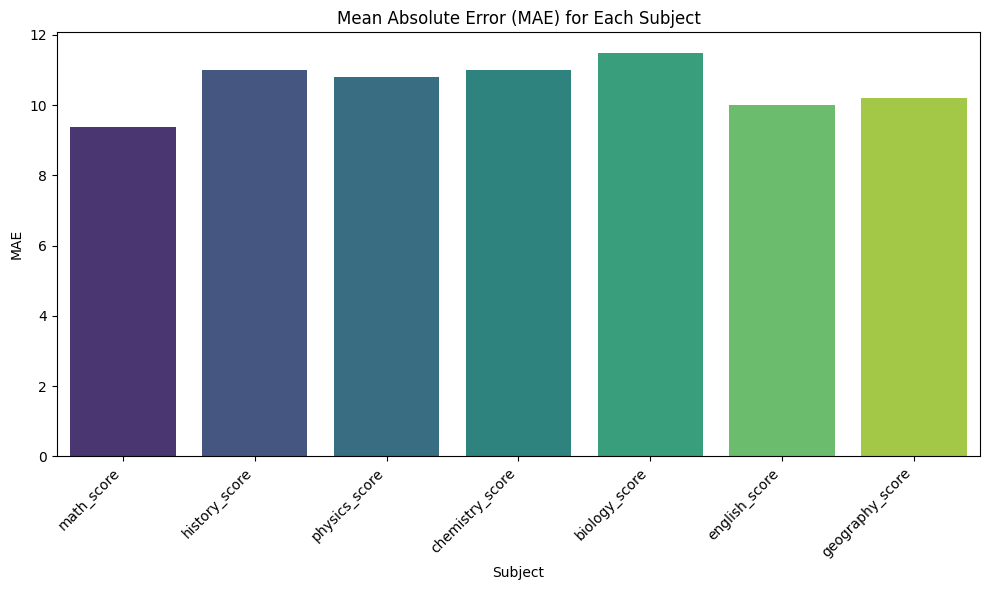

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) for Each Subject')
plt.xlabel('Subject')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

PREDICT OVERALL AVERAGE SCORE USING REGRESSION

In [ ]:
# Prepare data for average score prediction
df_clean = df.copy()
score_cols = ['math_score', 'history_score', 'physics_score', 'chemistry_score',
              'biology_score', 'english_score', 'geography_score']
df_clean['average_score'] = df_clean[score_cols].mean(axis=1)
df_clean.drop(columns=score_cols, inplace=True)

X = df_clean.drop(columns=['average_score'])
y = df_clean['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

# Evaluate
def evaluate(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred)
    }

print("Linear Regression:", evaluate(y_test, lr_preds))
print("Random Forest:", evaluate(y_test, rf_preds))



Linear Regression: {'R2': 0.2809326566487109, 'MAE': 4.480561631416089, 'RMSE': 30.882498392313664}
Random Forest: {'R2': 0.3653031188780931, 'MAE': 4.044367589285715, 'RMSE': 27.25895646922463}


FEATURE IMPORTANCE PLOT

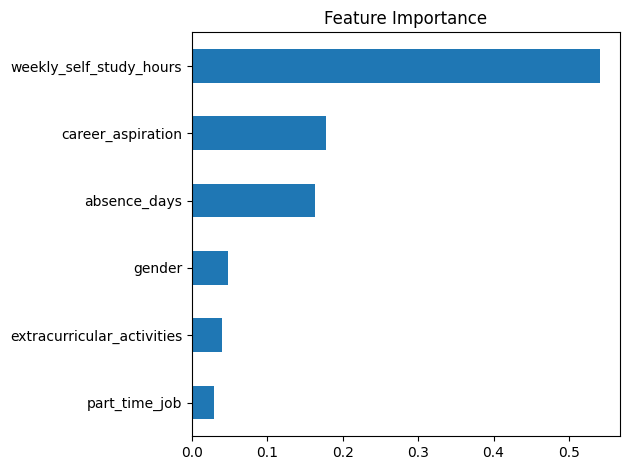

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()